# HPA labels for annotated clusters

Make pretty plot with proposed HPA labels and our final annotations for VAE_all and VAE_SBF2 model

In [1]:
from campa.constants import campa_config
from campa.data import MPPData
from campa.tl import Experiment
from campa.tl import (
    Cluster,
    Experiment,
    get_clustered_cells,
    load_full_data_dict,
    add_clustering_to_adata,
)
from campa.pl import annotate_img
import os
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
from campa_ana.constants import SOURCE_DIR
from pathlib import Path
import seaborn as sns
import matplotlib as mpl

Reading config from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini


## VAE_SBF2 experiment

In [2]:
exp_name = 'VAE_SBF2/CondVAE_siRNA-CC'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.005_sub-0.33')

fig_dir = Path(SOURCE_DIR)/'figures'/'fig5_suppl'
os.makedirs(str(fig_dir), exist_ok=True)

In [5]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
cl.set_cluster_name('clustering_res0.9_sub-0.33_seed3') 

# get HPA annotations
cluster_name = 'clustering_res0.9_sub-0.33_seed3'
results = cl.get_hpa_localisation(cluster_name=cluster_name, thresh=1, max_num_channels=3, limit_to_groups={'siRNA':'scrambled'})

/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
# common results data frame
df = {}
for idx, res in sorted(results.items(), key=lambda item: int(item[0])):
    annotation = cl.cluster_annotation.set_index(cluster_name).loc[str(idx)].annotation
    df[f'{annotation} ({idx})'] = res['subcellular_locations']
df = pd.DataFrame(df)
df = df.fillna(0)

<AxesSubplot:>

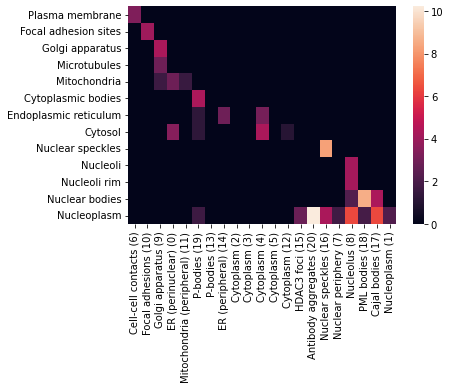

In [7]:
index_order = ['Plasma membrane', 'Focal adhesion sites', 'Golgi apparatus',  'Microtubules',  'Mitochondria', 
             'Cytoplasmic bodies',  'Endoplasmic reticulum', 'Cytosol',
               'Nuclear speckles', 'Nucleoli', 'Nucleoli rim', 'Nuclear bodies', 'Nucleoplasm']

columns_order = ['Cell-cell contacts (6)', 'Focal adhesions (10)', 'Golgi apparatus (9)', 
                  'ER (perinuclear) (0)', 'Mitochondria (peripheral) (11)', 'P-bodies (19)', 'P-bodies (13)',
                 'ER (peripheral) (14)', 'Cytoplasm (2)',
                 'Cytoplasm (3)', 'Cytoplasm (4)', 'Cytoplasm (5)',  'Cytoplasm (12)',  'HDAC3 foci (15)', 'Antibody aggregates (20)',
                 'Nuclear speckles (16)', 'Nuclear periphery (7)', 'Nucleolus (8)', 'PML bodies (18)',
                 'Cajal bodies (17)', 'Nucleoplasm (1)']
sns.heatmap(df.loc[index_order][columns_order])

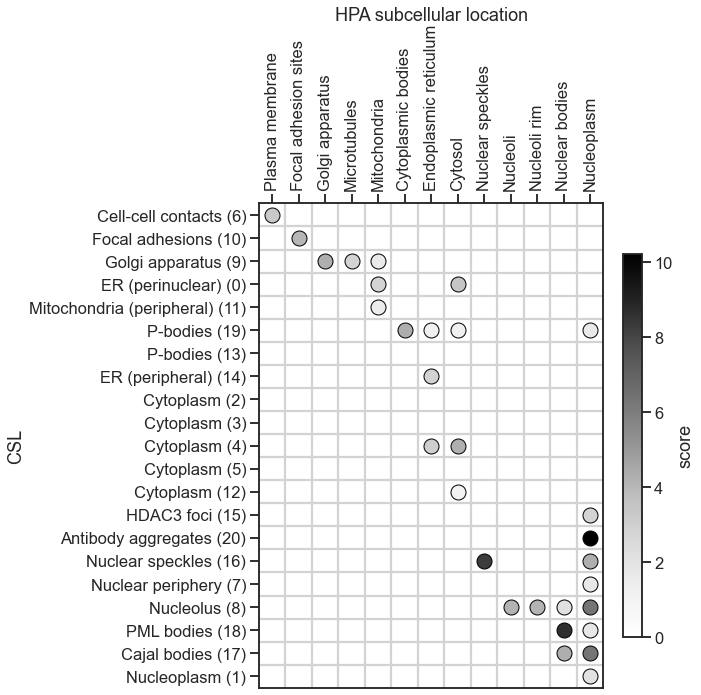

In [8]:
# make nicer plot of results
df = df.loc[index_order][columns_order]
norm = mpl.colors.Normalize(vmin=0, vmax=df.max().max())
cmap = mpl.colormaps['Greys']

sns.set_style('white')
sns.set_context('talk')

fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, clus in enumerate(df.columns):
    for j, loc in enumerate(df.index):
        score = df[clus].loc[loc]
        if score != 0:
            ax.plot(j, i, 'o', color=cmap(norm(score)), ms=15, markeredgecolor='black')
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(df.columns)
ax.tick_params(left=True)
for x in range(len(df.columns)-1):
    ax.axhline(x+0.5, color='lightgray')
for x in range(len(df.index)-1):
    ax.axvline(x+0.5, color='lightgray')
ax.xaxis.tick_top()
ax.set_ylim(-0.5,len(df.columns)-0.5)
ax.set_xlim(-0.5,len(df.index)-0.5)
ax.invert_yaxis()
ax.set_ylabel('CSL')
ax.set_xlabel('HPA subcellular location')
ax.xaxis.set_label_position('top') 
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='score', fraction=0.05, shrink=0.8) # location='bottom', fraction=0.05, shrink=0.8)
plt.tight_layout()
plt.savefig(fig_dir / 'annotation_hpa.pdf', dpi=300)

## VAE_all experiment

In [9]:
exp_name = 'VAE_all/CondVAE_pert-CC'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')

fig_dir = Path(SOURCE_DIR)/'figures'/'fig1_suppl'
os.makedirs(str(fig_dir), exist_ok=True)

In [10]:
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
cl.set_cluster_name('clustering_res0.5') 

# get HPA annotations
cluster_name = 'clustering_res0.5'
results = cl.get_hpa_localisation(cluster_name=cluster_name, thresh=1, max_num_channels=3, limit_to_groups={'perturbation_duration':'normal'})

/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [11]:
# common results data frame
df = {}
for idx, res in sorted(results.items(), key=lambda item: int(item[0])):
    annotation = cl.cluster_annotation.set_index(cluster_name).loc[str(idx)].annotation
    df[f'{annotation} ({idx})'] = res['subcellular_locations']
df = pd.DataFrame(df)
df = df.fillna(0)

<AxesSubplot:>

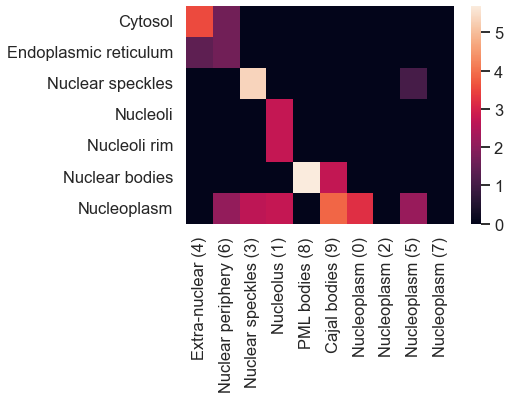

In [12]:
index_order = ['Cytosol', 'Endoplasmic reticulum', 'Nuclear speckles', 'Nucleoli', 'Nucleoli rim', 'Nuclear bodies', 'Nucleoplasm']

columns_order = ['Extra-nuclear (4)', 'Nuclear periphery (6)', 'Nuclear speckles (3)', 'Nucleolus (1)', 'PML bodies (8)',
                 'Cajal bodies (9)', 'Nucleoplasm (0)', 'Nucleoplasm (2)', 'Nucleoplasm (5)', 'Nucleoplasm (7)']
sns.heatmap(df.loc[index_order][columns_order])

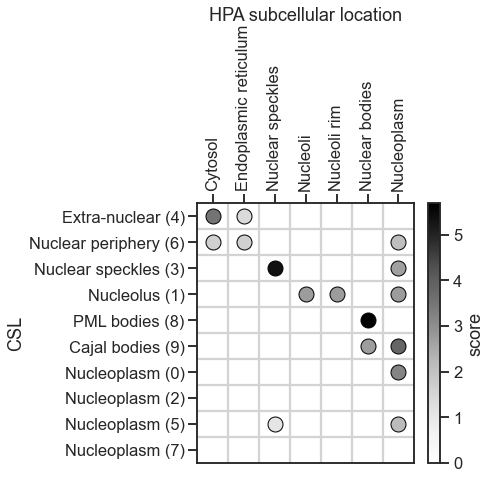

In [13]:
# make nicer plot of results
df = df.loc[index_order][columns_order]

norm = mpl.colors.Normalize(vmin=0, vmax=df.max().max())
cmap = mpl.colormaps['Greys']

sns.set_style('white')
sns.set_context('talk')

fig, ax = plt.subplots(1,1, figsize=(7,7))
for i, clus in enumerate(df.columns):
    for j, loc in enumerate(df.index):
        score = df[clus].loc[loc]
        if score != 0:
            ax.plot(j, i, 'o', color=cmap(norm(score)), ms=15, markeredgecolor='black')
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(df.columns)
ax.tick_params(left=True)
for x in range(len(df.columns)-1):
    ax.axhline(x+0.5, color='lightgray')
for x in range(len(df.index)-1):
    ax.axvline(x+0.5, color='lightgray')
ax.xaxis.tick_top()
ax.set_ylim(-0.5,len(df.columns)-0.5)
ax.set_xlim(-0.5,len(df.index)-0.5)
ax.invert_yaxis()
ax.set_ylabel('CSL')
ax.set_xlabel('HPA subcellular location')
ax.xaxis.set_label_position('top') 
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='score')
plt.tight_layout()
plt.savefig(fig_dir / 'annotation_hpa.pdf', dpi=300)

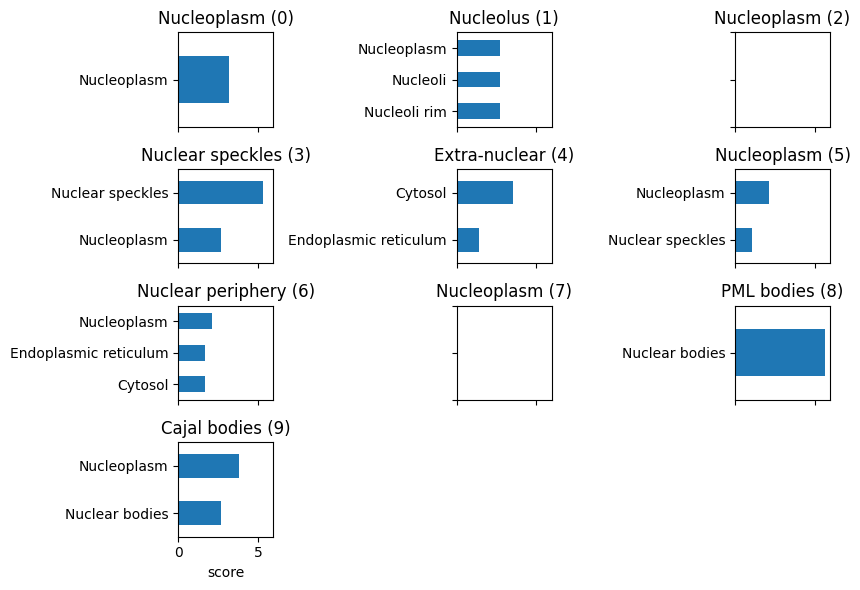

In [13]:
# plot HPA annotation of clusters
fig, axes = plt.subplots(len(results)//3+1, 3, squeeze=False, sharex=True, figsize=(8.5,6))
for ax, (idx, res) in zip(axes.flat, sorted(results.items(), key=lambda item: int(item[0]))):
    if (res['subcellular_locations'] is not None) and (len(res['subcellular_locations']) > 0):
        #print(res['subcellular_locations'])
        res['subcellular_locations'].plot(kind='barh', ax=ax)
        ax.invert_yaxis()
        ax.set_xlabel('score')
    else:
        ax.set_yticklabels('')
    ax.set_title(f'{cl.cluster_annotation.set_index(cluster_name).loc[str(idx)].annotation} ({idx})')
axes.flat[-1].axis('off')
axes.flat[-2].axis('off')
#plt.suptitle(f'Subcellular locations by HPA of CSLs on 184A1 dataset')
plt.tight_layout()
#plt.savefig(fig_dir / 'annotation_hpa.png', dpi=300)